# Classificação clássica do dataset


## Análise Exploratória

In [45]:
''' Bibliotecas importadas '''
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [46]:
''' Importação do dataset '''  
df = pd.read_csv('lung_disease_data.csv')
df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes
...,...,...,...,...,...,...,...,...
5195,40.0,Male,No,1.43,Lung Cancer,Medication,1.0,Yes
5196,21.0,NaN,Yes,1.50,COPD,Medication,4.0,No
5197,42.0,Female,No,5.53,Pneumonia,Surgery,5.0,No
5198,82.0,Male,No,3.68,Bronchitis,Medication,9.0,No


In [47]:
''' Análise exploratória dos dados '''
df.info()
df.head()
print(f"\nValores nulos:\n{df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB

Valores nulos:
Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64


In [48]:
# Separação dos valores numéricos e categóricos para cleaning e tratamento de NaN's
numeric_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']

# Tratamento dos valores numéricos
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Preenchimento da coluna {col} com os valores médios {median_val}")

# Tratamento dos valores categóricos
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Preenchimento da coluna {col} com a moda dos valores '{mode_val}'")

# Nova checagem sobre valores faltantes
print('\nMissing values após tratamento:')
display(df[numeric_cols + categorical_cols].isnull().sum())

Preenchimento da coluna Age com os valores médios 54.0
Preenchimento da coluna Lung Capacity com os valores médios 3.48
Preenchimento da coluna Hospital Visits com os valores médios 8.0
Preenchimento da coluna Gender com a moda dos valores 'Female'
Preenchimento da coluna Smoking Status com a moda dos valores 'Yes'
Preenchimento da coluna Disease Type com a moda dos valores 'Bronchitis'
Preenchimento da coluna Treatment Type com a moda dos valores 'Medication'
Preenchimento da coluna Recovered com a moda dos valores 'Yes'

Missing values após tratamento:


/tmp/ipykernel_124656/777224707.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_124656/777224707.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Age                0
Lung Capacity      0
Hospital Visits    0
Gender             0
Smoking Status     0
Disease Type       0
Treatment Type     0
Recovered          0
dtype: int64

In [49]:
# Encoding das variáveis categóricas
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,0,0,4.49,2,2,14.0,1
1,34.0,0,1,3.48,1,1,7.0,0
2,80.0,1,1,1.95,2,0,4.0,1
3,40.0,0,1,3.48,1,0,1.0,0
4,43.0,1,1,4.60,2,1,8.0,1
...,...,...,...,...,...,...,...,...
5195,40.0,1,0,1.43,3,0,1.0,1
5196,21.0,0,1,1.50,2,0,4.0,0
5197,42.0,0,0,5.53,4,1,5.0,0
5198,82.0,1,0,3.68,1,0,9.0,0


Resultado do label encoding gera:

> Gender: {Female - 0, Male - 1}

> Smoking Status: {No - 0, Yes - 1}

> Disease type: {Asthma - 0, COPD - 1, Bronchitis - 2, Lung Cancer - 3, Pneumonia - 4}

> Treatment type: {Medication - 0, Surgery - 1, Therapy - 2}

> Recovered: {No - 0, Yes - 1}




<Axes: >

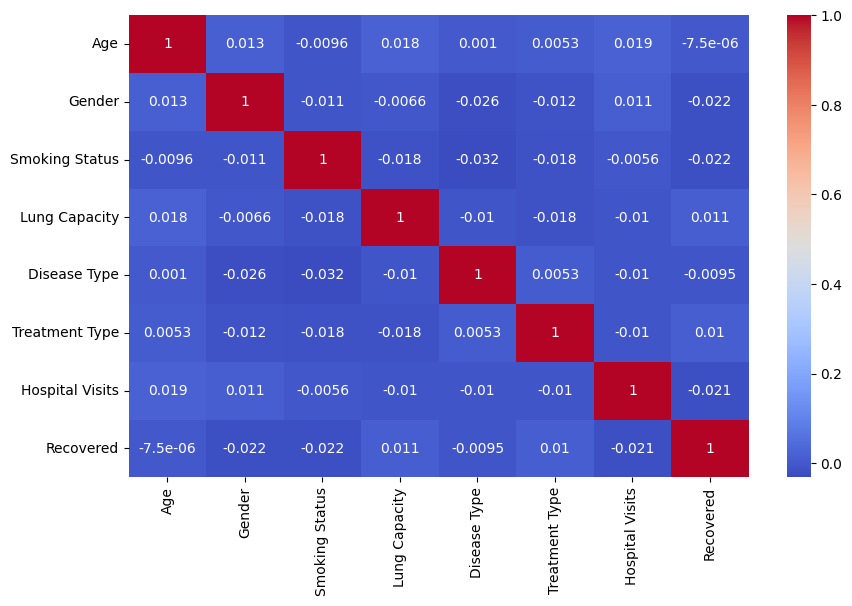

In [50]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Dados sem correlação, estão praticamente todos independentes entre si

## Aplicação de métodos de classificação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Separação dos dados para trein e teste
y = df['Recovered'] 
X = df.drop('Recovered', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1 - Regressão Logística:

In [ ]:
# Padronização dos dados para LR
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.transform(X_test)

# Treinamento e aplicação do modelo
lr_model = LogisticRegression()
lr_model.fit(X_train_pad, y_train)
y_pred = lr_model.predict(X_test_pad)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
print(f"F1: {metrics.f1_score(y_test, y_pred)}")

Acurácia: 0.5557692307692308
Precision: 0.5650364203954215
Recall: 0.9250425894378195
F1: 0.7015503875968992


2 - Random Forest Classifier

In [65]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
print(f"F1: {metrics.f1_score(y_test, y_pred)}")

Acurácia: 0.5355769230769231
Precision: 0.588135593220339
Recall: 0.5911413969335605
F1: 0.5896346644010195


3 - SVC

In [67]:
svc_model = SVC()
svc_model.fit(X_train_pad, y_train)
y_pred = svc_model.predict(X_test_pad)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
print(f"F1: {metrics.f1_score(y_test, y_pred)}")

Acurácia: 0.5134615384615384
Precision: 0.5523932729624839
Recall: 0.727427597955707
F1: 0.6279411764705882
